In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### The Chaotic Pendulum

Equation of motion for a driven pendulum

$$
\frac{d^2\theta}{dt^2} = -\left(\frac{g}{l}\right) \sin\theta - q \frac{d\theta}{dt} + F_D \sin(\omega_D t)
$$

Choose natural time-scale as $T_0 = 2\pi\sqrt{l/g}$. Define $\tau$ as time measured in units of $T_0$. Then, the equation of motion reduces to 

$$
\frac{d^2\theta}{d\tau^2} = -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
$$

where $b = q T_0$, $A = F_D T_0^2$ and $\kappa = \omega_D T_0 = 2\pi (T_0/T_D)$. The equation of motion can be expressed as a system of coupled first order differential equations

$$
\begin{align*}
\frac{d\theta}{dt} &= v \\
\frac{dv}{dt} &= -4\pi^2 \sin\theta - b \frac{d\theta}{d\tau} + A \sin(\kappa \tau)
\end{align*}
$$

In [2]:
## Runge Kutta RHS functions

def f(theta, v, tau):
    return v

def g(theta, v, tau, b, kappa, Fd):
    return -4 * (np.pi**2) * np.sin(theta) - b * v + 4. * (np.pi**2) * Fd * np.sin(kappa * tau)

In [3]:
def RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd):
    theta = theta0
    v = v0
    tau = 0
    n_steps = int(tau_f / delta_tau)
    thetas = [theta]
    vs = [v]
    taus = [tau]
    for step in range(1, n_steps + 1):
        k1 = delta_tau * f(theta, v, tau)
        q1 = delta_tau * g(theta, v, tau, b, kappa, Fd)
        k2 = delta_tau * f(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau)
        q2 = delta_tau * g(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau, b, kappa, Fd)
        k3 = delta_tau * f(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau)
        q3 = delta_tau * g(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau, b, kappa, Fd)
        k4 = delta_tau * f(theta + k3, v + q3, tau + delta_tau)
        q4 = delta_tau * g(theta + k3, v + q3, tau + delta_tau, b, kappa, Fd)
        theta += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        v += (q1 + 2 * q2 + 2 * q3 + q4) / 6
        tau += delta_tau
        thetas.append(theta)
        vs.append(v)
        taus.append(tau)
    
    return taus, thetas, vs

def RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd):
    theta = theta0
    v = v0
    tau = 0
    n_steps = int(tau_f / delta_tau)
    thetas = []
    vs = []
    for step in range(1, n_steps + 1):
        k1 = delta_tau * f(theta, v, tau)
        q1 = delta_tau * g(theta, v, tau, b, kappa, Fd)
        k2 = delta_tau * f(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau)
        q2 = delta_tau * g(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau, b, kappa, Fd)
        k3 = delta_tau * f(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau)
        q3 = delta_tau * g(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau, b, kappa, Fd)
        k4 = delta_tau * f(theta + k3, v + q3, tau + delta_tau)
        q4 = delta_tau * g(theta + k3, v + q3, tau + delta_tau, b, kappa, Fd)
        theta += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        v += (q1 + 2 * q2 + 2 * q3 + q4) / 6
        tau += delta_tau
        if tau > tau_f/2:
            thetas.append(theta)
            vs.append(v)
    
    return thetas, vs



First, we keep damping high

In [56]:
q = 5.
omega_D = 2/3
T0 = 2 * np.pi
b = q * T0
kappa = omega_D * T0
delta_tau = 0.01

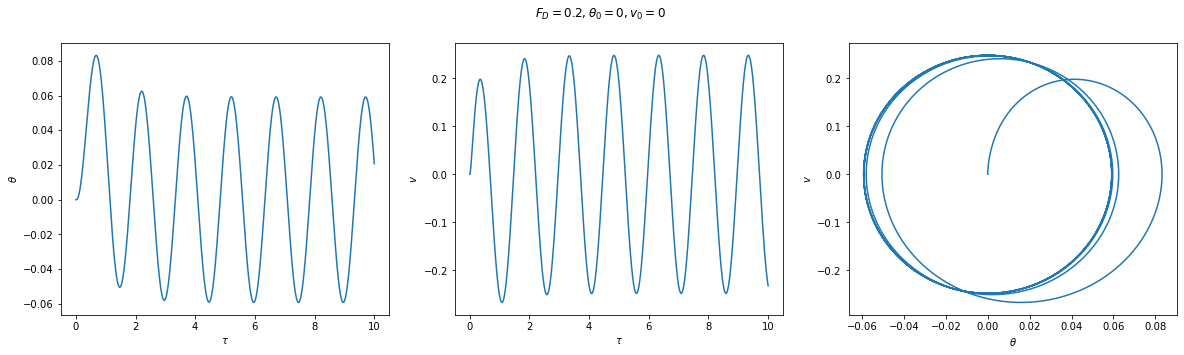

In [57]:
Fd = 0.2
theta0 = 0
v0 = 0
tau_f = 10
taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(r'$F_D = {}, \theta_0 = {}, v_0 = {}$'.format(Fd, theta0, v0))
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$\theta$')
ax[0].plot(taus, thetas)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$v$')
ax[1].plot(taus, vs)
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$v$')
ax[2].plot(thetas, vs);


Fix all parameters, except $F_D$, and initial conditions, which we will vary

In [58]:
q = 0.5
omega_D = 2/3
T0 = 2 * np.pi
b = q * T0
kappa = omega_D * T0
delta_tau = 0.01

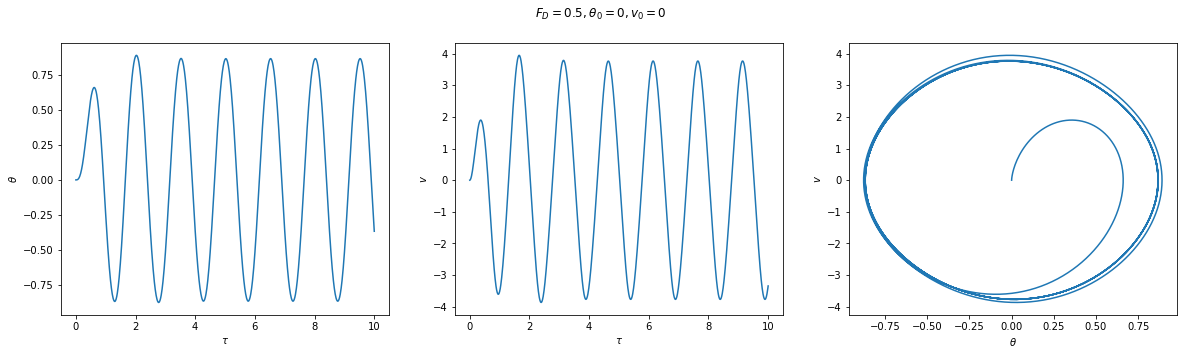

In [59]:
Fd = 0.5
theta0 = 0
v0 = 0
tau_f = 10
taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(r'$F_D = {}, \theta_0 = {}, v_0 = {}$'.format(Fd, theta0, v0))
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$\theta$')
ax[0].plot(taus, thetas)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$v$')
ax[1].plot(taus, vs)
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$v$')
ax[2].plot(thetas, vs);


Vary initial conditions for same value of $F_D$

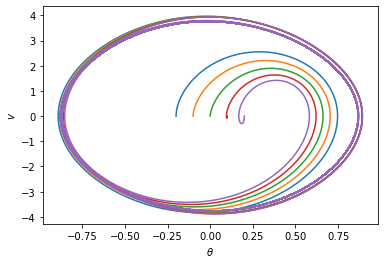

In [60]:
Fd = 0.5
theta0s = [-0.2, -0.1, 0, 0.1, 0.2]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)


Observe only late time behaviour

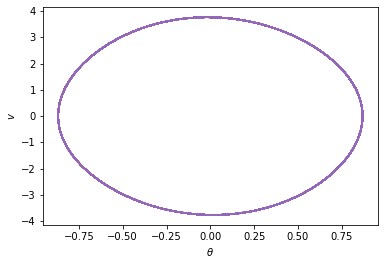

In [61]:
Fd = 0.5
theta0s = [-0.2, -0.1, 0, 0.1, 0.2]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    thetas, vs = RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)


Increase the damping force

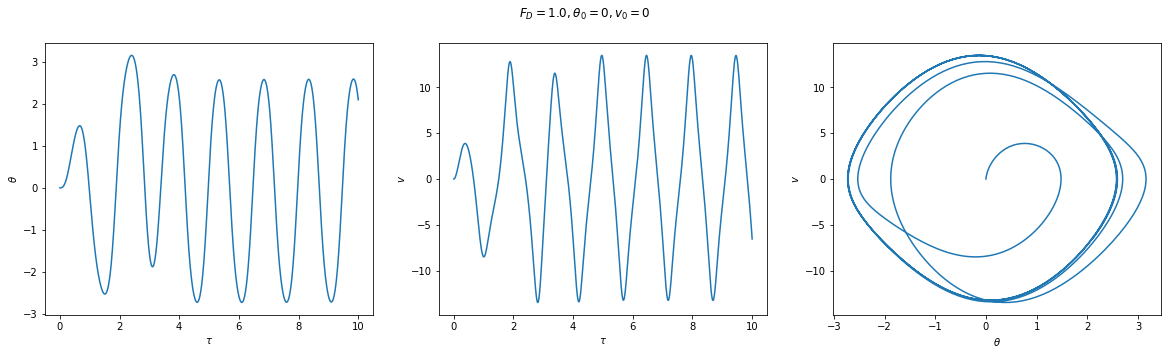

In [62]:
Fd = 1.
theta0 = 0
v0 = 0
tau_f = 10
taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(r'$F_D = {}, \theta_0 = {}, v_0 = {}$'.format(Fd, theta0, v0))
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$\theta$')
ax[0].plot(taus, thetas)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$v$')
ax[1].plot(taus, vs)
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$v$')
ax[2].plot(thetas, vs);


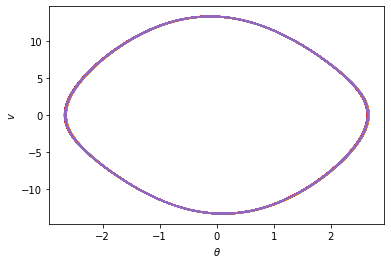

In [63]:
Fd = 1.
theta0s = [-0.2, -0.1, 0, 0.1, 0.2]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    thetas, vs = RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)


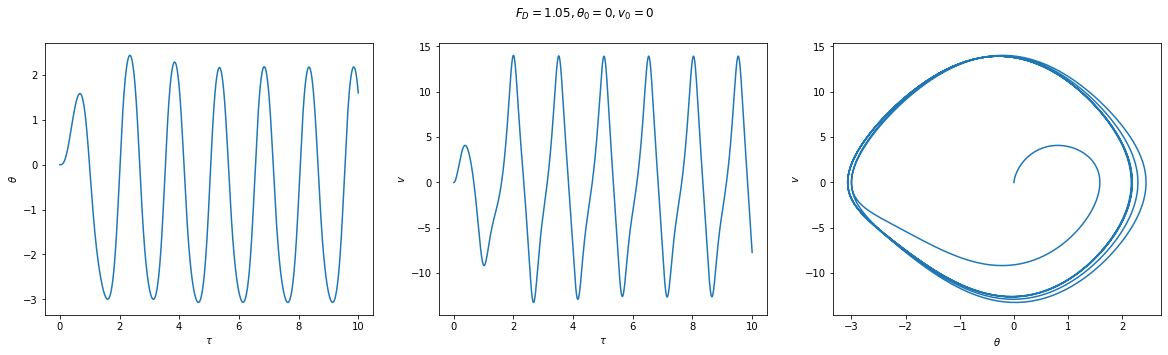

In [64]:
Fd = 1.05
theta0 = 0
v0 = 0
tau_f = 10
taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(r'$F_D = {}, \theta_0 = {}, v_0 = {}$'.format(Fd, theta0, v0))
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$\theta$')
ax[0].plot(taus, thetas)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$v$')
ax[1].plot(taus, vs)
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$v$')
ax[2].plot(thetas, vs);


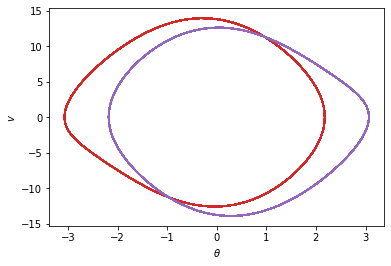

In [13]:
Fd = 1.05
theta0s = [-0.2, -0.1, 0, 0.1, 0.2]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    thetas, vs = RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)


Let us zoom in and observe

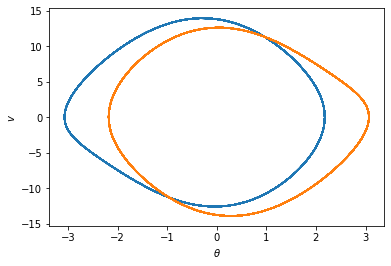

In [65]:
Fd = 1.05
theta0s = [0.12, 0.125]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    thetas, vs = RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)


**Chaos!!**

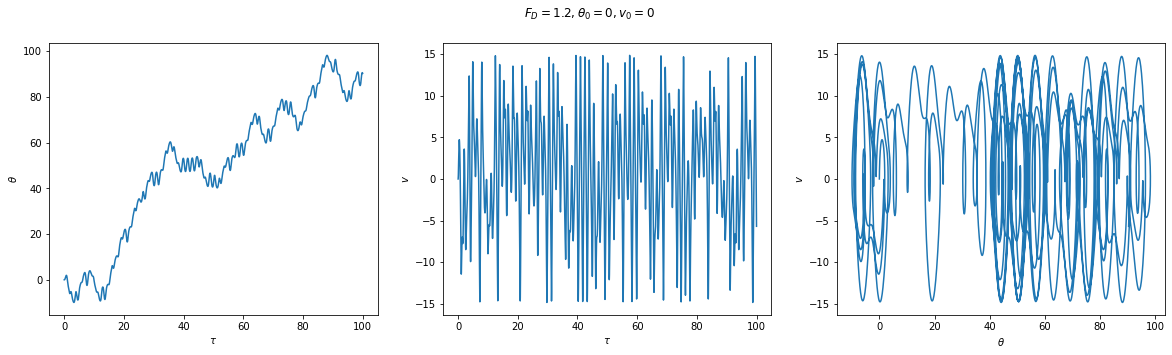

In [66]:
Fd = 1.2
theta0 = 0
v0 = 0
tau_f = 100
taus, thetas, vs = RK4(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(r'$F_D = {}, \theta_0 = {}, v_0 = {}$'.format(Fd, theta0, v0))
ax[0].set_xlabel(r'$\tau$')
ax[0].set_ylabel(r'$\theta$')
ax[0].plot(taus, thetas)
ax[1].set_xlabel(r'$\tau$')
ax[1].set_ylabel(r'$v$')
ax[1].plot(taus, vs)
ax[2].set_xlabel(r'$\theta$')
ax[2].set_ylabel(r'$v$')
ax[2].plot(thetas, vs);


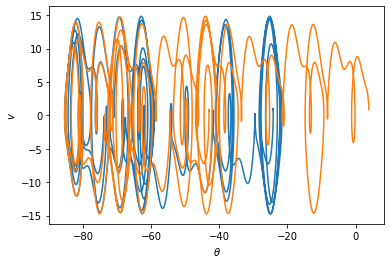

In [68]:
Fd = 1.2
theta0s = [0.1, 0.15]
v0 = 0
tau_f = 100

plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

for theta0 in theta0s:
    taus, thetas, vs
    thetas, vs = RK4_Steady(theta0, v0, tau_f, delta_tau, b, kappa, Fd)
    plt.plot(thetas, vs)

### Poincare Section

We take a snapshot of the system at times that are in phase with the driving force. That is, when $t = n \ T_D$ which is the same as $\tau = n (T_D/T_0)$. The following code extracts this behaviour. We do this at a particular value of the driving force. We fix $T_D = 2 T_0/3$, so that the snapshots are taken at $\tau = 3 n / 2$.

In [4]:
def Poincare(theta0, v0, tau_f, delta_tau, b, kappa, Fd):
    theta = theta0
    v = v0
    tau = 0
    n_steps = int(tau_f / delta_tau)
    thetas = []
    vs = []
    tau_cut = tau_f / 2
    n = int(2 * tau_cut / 3) + 1
    for step in range(1, n_steps + 1):
        k1 = delta_tau * f(theta, v, tau)
        q1 = delta_tau * g(theta, v, tau, b, kappa, Fd)
        k2 = delta_tau * f(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau)
        q2 = delta_tau * g(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau, b, kappa, Fd)
        k3 = delta_tau * f(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau)
        q3 = delta_tau * g(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau, b, kappa, Fd)
        k4 = delta_tau * f(theta + k3, v + q3, tau + delta_tau)
        q4 = delta_tau * g(theta + k3, v + q3, tau + delta_tau, b, kappa, Fd)
        theta += (k1 + 2 * k2 + 2 * k3 + k4) / 6
#         if theta < -np.pi:
#             theta += 2 * np.pi
#         elif theta > np.pi:
#             theta -= 2 * np.pi
        while theta < -np.pi:
            theta += 2 * np.pi
        while theta > np.pi:
            theta -= 2 * np.pi
        v += (q1 + 2 * q2 + 2 * q3 + q4) / 6
        tau += delta_tau
        if tau > tau_f/2 and abs(tau - 3 * n / 2) < delta_tau / 2:
            thetas.append(theta)
            vs.append(v)
            n += 1
    
    return thetas, vs

In [5]:
Fd = 1.0825
q = 0.5
T0 = 2 * np.pi
omega_D = 2/3
delta_tau = 0.01
tau_f = 1000
theta0 = 0.2
v0 = 0
b = q * T0
kappa = omega_D * T0

thetas, vs = Poincare(theta0, v0, tau_f, delta_tau, b, kappa, Fd)

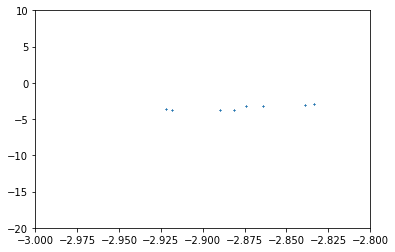

In [6]:
plt.xlim(-3., -2.8)
plt.ylim(-20, 10)
plt.scatter(thetas, vs, s=0.02);

**Bifurcation**

In [8]:
Nd = 50
delta_Fd = (1.5 - 1.4) / Nd
n = 500 # No. of periods of the external driving force
end_tau = 2 * np.pi * n / kappa
tau_cut = 2 * np.pi * 100 / kappa
index = 0
initial_period = 200
Fds = [1.4 + i * delta_Fd for i in range(Nd)]
theta_array = np.zeros((Nd, n - initial_period + 1))
v_array = np.zeros((Nd, n - initial_period + 1))
Fd_array = np.zeros((Nd, n - initial_period + 1))

for Fd in tqdm(Fds):
    period = initial_period
    tau = 0
    theta = 2.
    v = 0
    thetas = []
    vs = []
    while tau < end_tau:
        k1 = delta_tau * f(theta, v, tau)
        q1 = delta_tau * g(theta, v, tau, b, kappa, Fd)
        k2 = delta_tau * f(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau)
        q2 = delta_tau * g(theta + 0.5 * k1, v + 0.5 * q1, tau + 0.5 * delta_tau, b, kappa, Fd)
        k3 = delta_tau * f(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau)
        q3 = delta_tau * g(theta + 0.5 * k2, v + 0.5 * q2, tau + 0.5 * delta_tau, b, kappa, Fd)
        k4 = delta_tau * f(theta + k3, v + q3, tau + delta_tau)
        q4 = delta_tau * g(theta + k3, v + q3, tau + delta_tau, b, kappa, Fd)
        theta += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        while theta < -np.pi:
            theta += 2 * np.pi
        while theta > np.pi:
            theta -= 2 * np.pi
        v += (q1 + 2 * q2 + 2 * q3 + q4) / 6
        tau += delta_tau
        if tau > tau_cut and abs(tau - 3 * period / 2) < delta_tau / 2:
            thetas.append(theta)
            vs.append(v)
            period += 1
        
    theta_array[index] = np.array(thetas)
    v_array[index] = np.array(vs)
    Fd_array[index] = Fd * np.ones(n - initial_period + 1)
    index += 1
 

        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:12<00:00,  2.64s/it]


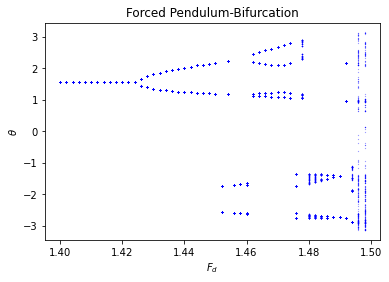

In [10]:
plt.xlabel(r'$F_d$') # Label for the x-axis
plt.ylabel(r'$\theta$') # Label for the y-axis
plt.title('Forced Pendulum-Bifurcation') # Title of plot
for i in range(Nd):
    plt.plot(Fd_array[i],theta_array[i], '.', markersize=0.3, color = 'b')